##### MSWEP has a spatial resolution of ~0.1 degree, GLEAM has a spatial resolution of 0.25 degree. MSWEP is regridded to match the resolution of GLEAM

In [1]:
import xarray as xr
import xesmf as xe
import numpy as np

main_dir = '/g/data/w97/ad9701/drought_2017to2020/'
ds_P = xr.open_dataset(main_dir + 'precip_data/precipitation_mswep_monthly_1979_2021.nc')
ds_P

<xarray.Dataset>
Dimensions:        (lon: 420, lat: 340, time: 508)
Coordinates:
  * lon            (lon) float32 112.1 112.2 112.3 112.4 ... 153.8 153.9 153.9
  * lat            (lat) float32 -10.05 -10.15 -10.25 ... -43.75 -43.85 -43.95
  * time           (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2021-05-01
Data variables:
    precipitation  (time, lat, lon) float32 ...

In [2]:
ds_P['precipitation']

<xarray.DataArray 'precipitation' (time: 508, lat: 340, lon: 420)>
[72542400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 112.1 112.2 112.3 112.4 ... 153.7 153.8 153.9 153.9
  * lat      (lat) float32 -10.05 -10.15 -10.25 -10.35 ... -43.75 -43.85 -43.95
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2021-05-01
Attributes:
    units:    mm month-1

In [3]:
ds_PET = xr.open_dataset(main_dir + 'PminusPET/Ep_gleam_monthly_1980_2020.nc')
ds_PET

<xarray.Dataset>
Dimensions:  (time: 492, lon: 168, lat: 136)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-16 1980-02-15 ... 2020-12-16
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Data variables:
    Ep       (time, lon, lat) float64 ...

In [18]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-10.125, -44.125, -0.25)),
        "lon": (["lon"], np.arange(112.125, 154.125, 0.25)),
    }
)

In [19]:
ds_out

<xarray.Dataset>
Dimensions:  (lat: 136, lon: 168)
Coordinates:
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
Data variables:
    *empty*

In [16]:
ds_PET.lat.values

array([-10.125, -10.375, -10.625, -10.875, -11.125, -11.375, -11.625,
       -11.875, -12.125, -12.375, -12.625, -12.875, -13.125, -13.375,
       -13.625, -13.875, -14.125, -14.375, -14.625, -14.875, -15.125,
       -15.375, -15.625, -15.875, -16.125, -16.375, -16.625, -16.875,
       -17.125, -17.375, -17.625, -17.875, -18.125, -18.375, -18.625,
       -18.875, -19.125, -19.375, -19.625, -19.875, -20.125, -20.375,
       -20.625, -20.875, -21.125, -21.375, -21.625, -21.875, -22.125,
       -22.375, -22.625, -22.875, -23.125, -23.375, -23.625, -23.875,
       -24.125, -24.375, -24.625, -24.875, -25.125, -25.375, -25.625,
       -25.875, -26.125, -26.375, -26.625, -26.875, -27.125, -27.375,
       -27.625, -27.875, -28.125, -28.375, -28.625, -28.875, -29.125,
       -29.375, -29.625, -29.875, -30.125, -30.375, -30.625, -30.875,
       -31.125, -31.375, -31.625, -31.875, -32.125, -32.375, -32.625,
       -32.875, -33.125, -33.375, -33.625, -33.875, -34.125, -34.375,
       -34.625, -34.

In [51]:
np.diff(ds_PET.lon.values)

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.

In [44]:
da_PET_transpose = ds_PET['Ep'].transpose('time', 'lat', 'lon')
da_PET_transpose

<xarray.DataArray 'Ep' (time: 492, lat: 136, lon: 168)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Attributes:
    standard_name:  Potential evaporation
    long_name:      Potential evaporation from GLEAM v3.5a
    units:          mm/month

In [9]:
ds_P['precipitation']

<xarray.DataArray 'precipitation' (time: 508, lat: 340, lon: 420)>
array([[[161.75  , 156.9375, ..., 308.375 , 316.875 ],
        [171.875 , 168.25  , ..., 319.375 , 328.1875],
        ...,
        [ 31.4375,  33.375 , ...,  55.0625,  53.75  ],
        [ 30.5625,  31.5625, ...,  56.9375,  54.875 ]],

       [[142.    , 141.125 , ..., 173.625 , 173.875 ],
        [137.5   , 133.25  , ..., 172.5625, 176.4375],
        ...,
        [ 73.125 ,  72.25  , ...,  62.5   ,  67.0625],
        [ 75.4375,  74.75  , ...,  62.0625,  64.3125]],

       ...,

       [[225.5   , 228.    , ..., 470.    , 462.125 ],
        [223.875 , 223.25  , ..., 507.25  , 506.    ],
        ...,
        [140.75  , 141.1875, ..., 157.0625, 158.    ],
        [145.8125, 144.875 , ..., 157.0625, 157.8125]],

       [[  7.6875,   7.0625, ..., 274.625 , 273.125 ],
        [  6.75  ,   7.3125, ..., 244.625 , 237.25  ],
        ...,
        [ 87.0625,  84.3125, ...,  70.3125,  72.375 ],
        [ 88.875 ,  86.6875, ...,  68.5   ,  68.25  ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 112.1 112.2 112.3 112.4 ... 153.7 153.8 153.9 153.9
  * lat      (lat) float32 -10.05 -10.15 -10.25 -10.35 ... -43.75 -43.85 -43.95
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2021-05-01
Attributes:
    units:    mm month-1

In [14]:
ds_out.lon

<xarray.DataArray 'lon' (lon: 167)>
array([112.125, 112.375, 112.625, 112.875, 113.125, 113.375, 113.625, 113.875,
       114.125, 114.375, 114.625, 114.875, 115.125, 115.375, 115.625, 115.875,
       116.125, 116.375, 116.625, 116.875, 117.125, 117.375, 117.625, 117.875,
       118.125, 118.375, 118.625, 118.875, 119.125, 119.375, 119.625, 119.875,
       120.125, 120.375, 120.625, 120.875, 121.125, 121.375, 121.625, 121.875,
       122.125, 122.375, 122.625, 122.875, 123.125, 123.375, 123.625, 123.875,
       124.125, 124.375, 124.625, 124.875, 125.125, 125.375, 125.625, 125.875,
       126.125, 126.375, 126.625, 126.875, 127.125, 127.375, 127.625, 127.875,
       128.125, 128.375, 128.625, 128.875, 129.125, 129.375, 129.625, 129.875,
       130.125, 130.375, 130.625, 130.875, 131.125, 131.375, 131.625, 131.875,
       132.125, 132.375, 132.625, 132.875, 133.125, 133.375, 133.625, 133.875,
       134.125, 134.375, 134.625, 134.875, 135.125, 135.375, 135.625, 135.875,
       136.125, 136.375, 136.625, 136.875, 137.125, 137.375, 137.625, 137.875,
       138.125, 138.375, 138.625, 138.875, 139.125, 139.375, 139.625, 139.875,
       140.125, 140.375, 140.625, 140.875, 141.125, 141.375, 141.625, 141.875,
       142.125, 142.375, 142.625, 142.875, 143.125, 143.375, 143.625, 143.875,
       144.125, 144.375, 144.625, 144.875, 145.125, 145.375, 145.625, 145.875,
       146.125, 146.375, 146.625, 146.875, 147.125, 147.375, 147.625, 147.875,
       148.125, 148.375, 148.625, 148.875, 149.125, 149.375, 149.625, 149.875,
       150.125, 150.375, 150.625, 150.875, 151.125, 151.375, 151.625, 151.875,
       152.125, 152.375, 152.625, 152.875, 153.125, 153.375, 153.625])
Coordinates:
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 152.9 153.1 153.4 153.6

In [20]:
regridder = xe.Regridder(ds_P['precipitation'], ds_out, 'bilinear')
da_P_out = regridder(ds_P['precipitation'])

In [34]:
da_P_out.to_netcdf(main_dir + 'PminusPET/precipitation_mswep_monthly_1979_2021_pt25deg.nc')

In [35]:
import pandas as pd
time_new = pd.to_datetime(ds_PET['time']).to_period('M').to_timestamp()
ds_PET = ds_PET.assign_coords({'time': time_new})
ds_PET

<xarray.Dataset>
Dimensions:  (time: 492, lon: 168, lat: 136)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Data variables:
    Ep       (time, lon, lat) float64 ...

In [36]:
da_PminusPET = da_P_out - ds_PET['Ep']
da_PminusPET

<xarray.DataArray (time: 492, lat: 136, lon: 168)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88

In [50]:
da_PminusPET.rename('PminusPET').to_netcdf(main_dir + 'PminusPET/PminusPET_gleam_monthly_1980_2020.nc')

In [37]:
da_mon = da_PminusPET.groupby('time.month').mean('time')
da_mon

<xarray.DataArray (month: 12, lat: 136, lon: 168)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

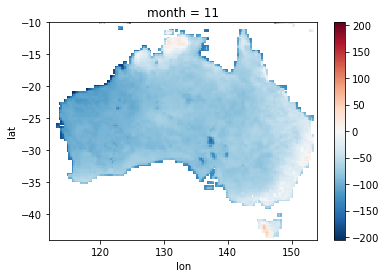

In [48]:
da_mon[10,:,:].plot()

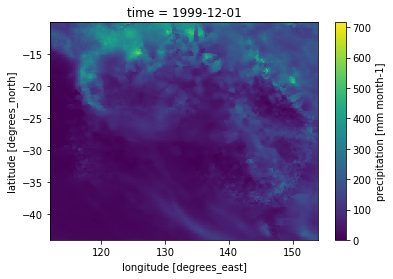

In [32]:
ds_P['precipitation'][250,:,:].plot()#_out

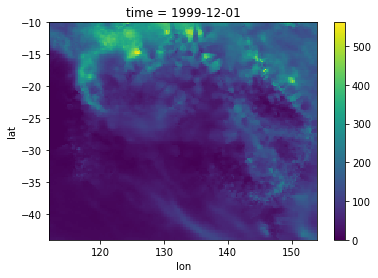

In [33]:
da_P_out[250,:,:].plot()

In [37]:
ds_PET['Ep'] #['time'].dt#.floor('MS')

<xarray.DataArray 'Ep' (time: 492, lon: 168, lat: 136)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Attributes:
    standard_name:  Potential evaporation
    long_name:      Potential evaporation from GLEAM v3.5a
    units:          mm/month

In [24]:
ds_PET['time']

<xarray.DataArray 'time' (time: 492)>
array(['1980-01-16T00:00:00.000000000', '1980-02-15T00:00:00.000000000',
       '1980-03-16T00:00:00.000000000', ..., '2020-10-16T00:00:00.000000000',
       '2020-11-15T12:00:00.000000000', '2020-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-16 1980-02-15 ... 2020-12-16
Attributes:
    standard_name:  time
    long_name:      time

In [3]:
np.diff(ds_P.lat.values)

array([-0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999752,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09999847,
       -0.09999847, -0.1000061 , -0.09999847, -0.09999847, -0.09

In [4]:
np.diff(ds_PET.lat.values)

array([-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25,

In [8]:
da_P_out.lat - ds_PET.lat

<xarray.DataArray 'lat' (lat: 136)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88

In [9]:
da_P_out.lon - ds_PET.lon

<xarray.DataArray 'lon' (lon: 168)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9